In [35]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

plotly.tools.set_credentials_file(username='amr7', api_key='4gj9vxlD7C63cCRCaRdU')

#iMac
#directory = '/Users/alexreblando/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ebs/usable_data'

########################first pilot data#########################################
#laptop
directory = '/Users/alexreblando/Documents/GitHub/ebs/usable_data'

    #old stories
directory_stories = '/Users/alexreblando/Downloads/ebs-36652a5cca73b2e88ccaa54f9b17522971304f24/story_xlsx_files'

#####################second pilot data#############################################
#laptop
#directory = '/Users/alexreblando/Documents/GitHub/ebs/usable_data_pilot2'
#directory_stories = '/Users/alexreblando/Documents/GitHub/ebs/pilot2_story_xlsx_files'

filenames = glob.glob(directory+ '/*.csv')
filenames_stories = glob.glob(directory_stories + '/*.xlsx')

dfs = []
dfs_stories = []

for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
for filename in filenames_stories:
    dfs_stories.append(pd.read_excel(filename))

In [36]:
dfs_stories

[                                            storyText  locationEvent  \
 0   Thomas, dreading the conversation he was about...              1   
 1   The restaurant had a kitschy charm and was rem...              1   
 2   A bell chimed as the door swung open and Sadie...              1   
 3              He jumped up and gave her a side hug.               1   
 4                      “How was your day?”, he asked.              1   
 5                   She clung onto him, “It was okay.              1   
 6                                I missed you today.”              1   
 7       He looked at the hostess coming towards them.              1   
 8   “Can we have a table in the back?”, Thomas asked.              1   
 9   She shrugged and, as she loudly popped her bub...              1   
 10  She led them to the back of the restaurant whe...              2   
 11             “Is this alright?”, the hostess asked.              2   
 12  Thomas cleared his throat and tried not to gri

In [37]:
#create a dictionary for each participant, documenting which stories they read paired with the schema 
#they were assigned for that story
size_dfs = len(dfs)
participants = dict()

for s in range(size_dfs):
    this_dict = dict()
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    this_p = dfs[s]['participant'].iloc[0]
    for i in range(8):
        final_dict = {
            'story':story_list[i],
            'schema':schema_list[i],
        }
        
        this_dict[i+1] = final_dict
        
    participants[this_p] = this_dict



4

In [38]:
z = dfs[0].loc[dfs[0]['count'] == 3]

this = 'question'+str(1)+'_answer'
x = pd.notna(z[this])
#print(z)

for i in range(len(z)):
    if x.iloc[i] == True:
        hold = z['question1_answer'].iloc[i]
    


In [39]:
#indexing into a matrix
z = '4'
b = 'hello'

h = np.array([z, b, '1', '2', '3', '4'])
print(h)
temp = h[2:6]
print(temp)
temp =  np.roll(temp, 2)
print(temp)
h[2:6] = temp
print(h)
r = 'l'
g = 'o'
q = '5'
values2 = [r,g]
values2.append(q)
h = np.vstack([h, values2])
print(h)

v = h[h[:,0] == '4']
v[0, 1]


['4' 'hello' '1' '2' '3' '4']
['1' '2' '3' '4']
['3' '4' '1' '2']
['4' 'hello' '3' '4' '1' '2']


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [40]:
#create a dictionary for the answers to the 8 questions for each story, not parsing the questions 
#by primed or unprimed

question_answers = dict()

for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    #if the data file has a question portion
    if 'question1_answer' in dfs[s].columns:
        
        #get the question order of the stories ("primed v not-primed first")
        question_order = dfs[s]['order of question']
        which_one = pd.notna(question_order)
        question_order_list = []
        for k in range(len(question_order)):
            if which_one[k] == True:
                question_order_list.append(question_order[k])  
        
        #loop through all the stories 
        for i in range(8):
            new_questions = [dfs[s]['participant'].iloc[0], story_list[i], schema_list[i]]
            which_rows = dfs[s].loc[dfs[s]['count'] == i]
            tally_completed = 0
            #loop through all the questions
            for j in range(8):
                this_question = 'question'+str(j+1)+'_answer'
                which_cell = pd.notna(which_rows[this_question])
                any_answer = np.any(which_cell)
                if any_answer == False:
                    new_questions.append('')
                else:
                    for t in range(len(which_rows)):
                        if which_cell.iloc[t] == True:
                            hold = which_rows[this_question].iloc[t]
                            tally_completed = tally_completed + 1
                    new_questions.append(hold)
            
            #move the order of the stories, so that location questions always come first
            if tally_completed > 0:
                if question_order_list[i] == 'primed first' and schema_list[i] == 'Social':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                if question_order_list[i] == 'non-primed first' and schema_list[i] == 'Location':
                    temp = new_questions[3:12]
                    temp = np.roll(temp, 4)
                    new_questions[3:12] = temp
                    
            #put all of the questions into dictionaries organized by story
            if story_list[i] in question_answers:
                question_answers[story_list[i]] = np.vstack((question_answers[story_list[i]], new_questions))
            else:
                question_answers[story_list[i]] = new_questions
                


In [41]:
#export each story answers to its own csv file
import csv

for key in question_answers:
    title = 'raw_recall/'+ key + '_recall_answers.csv'
    this_array = question_answers[key]
    with open(title, 'w') as csvfile:
        fieldnames = ['participant', 'story', 'schema', '1', '2', '3', '4','5', '6','7','8']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(len(this_array)):
            a = this_array[i, 0]
            b = this_array[i, 1]
            c = this_array[i, 2]
            d = this_array[i, 3]
            e = this_array[i, 4]
            f = this_array[i, 5]
            g = this_array[i, 6]
            h = this_array[i, 7]
            j = this_array[i, 8]
            k = this_array[i, 9]
            l = this_array[i, 10]
            writer.writerow({'participant': a, 'story': b, 'schema': c, '1': d, '2': e, '3': f, '4':g, '5':h, '6':j, '7':k,'8':l})

            
        

In [42]:
#return participants who have read a particular story
this_one = '44'

for key in participants:
    for key2 in participants[key]:
        if participants[key][key2]['story'] == this_one:
            print(key)
            print(participants[key][key2]['schema'])
            print(key2)

030119_p2
Social
8
030119_p3
Location
7
030419_p2
Location
5
030519_p1
Location
6
030719_p2
Location
1
030819_p1
Social
4
031219_p1
Social
2
031319_p1
Social
5
031319_p2
Location
2
031519_p2
Social
4
031519_p3
Social
4


In [43]:
#put all of the key presses into a dictionary, orginized by story
size_dfs = len(dfs)
loc_story_keys = dict()
soc_story_keys = dict()
for s in range(size_dfs):
    story_list = dfs[s]['order of stories'].iloc[0].split(' ')
    story_list = [elem.replace("[","").replace("]","") for elem in story_list]
    schema_list = dfs[s]['order of perspectives'].iloc[0].split(' ')
    schema_list = [elem.replace("[","").replace("]","") for elem in schema_list]
    schema_list = [elem.replace("\n","") for elem in schema_list]
    schema_list = [elem.replace("'","") for elem in schema_list]
    for i in range(8):
        keys = dfs[s]['story_presses.keys'].values[dfs[s]['count']==i]
        keys = keys[~np.isnan(keys)]
        if schema_list[i] == 'Location':
            if story_list[i] in loc_story_keys:
                loc_story_keys[story_list[i]] = np.concatenate((loc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                loc_story_keys[story_list[i]] = keys[:, np.newaxis]
        elif schema_list[i] == 'Social':
            if story_list[i] in soc_story_keys:
                soc_story_keys[story_list[i]] = np.concatenate((soc_story_keys[story_list[i]],keys[:,np.newaxis]), axis=1)
            else:
                soc_story_keys[story_list[i]] = keys[:, np.newaxis]

In [44]:
#put all of the a priori story boundaries into a dictionary organized by story

all_story_priors = dict()

for s in range(16):
    this_story = str(int(dfs_stories[s]['story'].iloc[0]))
    keys2 = dfs_stories[s]['locationEvent'].values
    keys3 = dfs_stories[s]['socialEvent'].values
    all_story_priors[this_story] = keys2[:, np.newaxis]
    all_story_priors[this_story] = np.concatenate((all_story_priors[this_story], keys3[:, np.newaxis]), axis = 1)

KeyError: 'story'

In [6]:
#for participant responses, convert all '1' presses to 0 values, and '9' presses to 1 values

for key in soc_story_keys:
    this_array = soc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    soc_story_keys[key] = this_array
    
for key in loc_story_keys:
    this_array = loc_story_keys[key]
    this_array[this_array ==1] = 0
    this_array[this_array == 9] = 1
    loc_story_keys[key] = this_array
    


In [7]:
#sum the responses
loc_percent_story_keys = dict()
soc_percent_story_keys = dict()

for key in loc_story_keys:
    this_sum = np.sum(loc_story_keys[key], axis = 1)
    N = np.size(loc_story_keys[key],1)
    this_percent = this_sum/N
    loc_percent_story_keys[key] = this_percent[:, np.newaxis]
    
for key in soc_story_keys:
    this_sum = np.sum(soc_story_keys[key], axis = 1)
    N = np.size(soc_story_keys[key],1)
    this_percent = this_sum/N
    soc_percent_story_keys[key] = this_percent[:, np.newaxis]
    

In [15]:
#see the responses of all participants for a story

print(loc_story_keys['22'])

[[1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [9]:
#find the average number and standard deviation of participants in each story 
#also for story lengths

lengths = []
N = []

for key in loc_story_keys:
    x, y = loc_story_keys[key].shape
    x1, y1 = soc_story_keys[key].shape
    lengths.append(x)
    lengths.append(x1)
    N.append(y)
    N.append(y1)
    
length_mean = statistics.mean(lengths)
length_sd = statistics.stdev(lengths)

N_mean = statistics.mean(N)
N_sd = statistics.stdev(N)
print(length_mean, length_sd, N_mean, N_sd)

36.375 7.836021044283356 5.75 2.2718473369882592


In [22]:
#get the binary version of the a priori boundaries

for key in all_story_priors:
    location = all_story_priors[key][:,0]
    social = all_story_priors[key][:,1]
    for i in range(0, len(location)):  
        if location[i] > location[i-1]:
            location[i] = 7
    for i in range(0, len(location)):  
        if location[i] != 7:
            location[i] = 0
    for i in range(0, len(social)):
        if social[i] > social[i - 1]:
            social[i] = 7
    for i in range(0, len(social)):
        if social[i] != 7:
            social[i] = 0
    location[0] = 7
    social[0] = 7
    location2 = location > 1
    social2 = social > 1
    location2 = location2.astype(int)
    social2 = social2.astype(int)
    all_story_priors[key] = np.concatenate((all_story_priors[key], location2[:, np.newaxis]), axis = 1) 
    all_story_priors[key] = np.concatenate((all_story_priors[key], social2[:, np.newaxis]), axis = 1)

In [23]:
all_story_priors['14']

array([[7, 7, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [7, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 7, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [7, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 7, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [7, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 7, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

In [29]:
#show the stories
key = ''
opacityPriors = 0.1

new_x = np.arange(len(all_story_priors[key]) + 1)
#new_x = np.delete(x_index, 0)
trace1 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,2], 
                mode = 'lines+markers', 
                name = 'location Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(0, 204, 0, .05)'),
                    width = 4))

trace2 = go.Scatter(x = new_x, 
                y = all_story_priors[key][:,3], 
                mode = 'lines+markers', 
                name = 'social Event Starts',
                line = dict(
                    shape = 'hvh',
                    color = ('rgba(255, 91, 71, .05)'),
                    width = 4))

trace3 = go.Scatter(x = new_x, 
                    y = loc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participant w location',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(0, 191, 255, .5)'),
                        width = 4))

trace4 = go.Scatter(x = new_x, 
                    y = soc_percent_story_keys[key], 
                    mode = 'lines+markers', 
                    name = 'participants w social',
                    line = dict(
                        shape = 'hvh',
                        color = ('rgba(255, 215, 0, .5)'),
                        width = 4))


data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title= key,
    xaxis=dict(
        title='Sentence Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/Users/alexreblando/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
#find the mean correlation of the responses of participants with the same schema for each story and store the
#value in a dictionary
soc_cor = dict()
loc_cor = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    soc_this = np.nanmean(np.corrcoef(soc_story_keys[key].T)[np.triu(np.ones((z,z), dtype=np.bool),1)])
    soc_cor[key] = soc_this
    g = len(loc_story_keys[key][0])
    loc_this = np.nanmean(np.corrcoef(loc_story_keys[key].T)[np.triu(np.ones((g,g), dtype=np.bool),1)])
    loc_cor[key] = loc_this
    

for key in soc_cor:
    print(key)
    print('loc:', loc_cor[key])
    print('soc:', soc_cor[key])
    
loc_cor_avg = np.array(list(loc_cor.values())).mean()
soc_cor_avg = np.array(list(soc_cor.values())).mean()
combined_avg = (loc_cor_avg + soc_cor_avg)/2
print('loc_avg: ', loc_cor_avg)
print('soc_avg: ', soc_cor_avg)
print('general avg: ', combined_avg)

12
loc: 0.19955380489428873
soc: 0.1577916642824127
31
loc: 0.3445297430531166
soc: 0.3302002762169798
43
loc: 0.16839215754740292
soc: 0.3545245679456396
24
loc: 0.14463698498546107
soc: 0.2336487172178229
23
loc: 0.306308013876848
soc: 0.20985257489672077
11
loc: 0.37711864406779627
soc: 0.21468811705803534
32
loc: 0.27504899982976055
soc: 0.1433510385893565
44
loc: 0.5805339172842425
soc: 0.16894675451510968
21
loc: 0.3825291232432217
soc: 0.24042685608175898
33
loc: 0.10887759855396663
soc: 0.11916350888251724
42
loc: 0.16630071268405713
soc: 0.19523681250099525
14
loc: 0.4747213305872215
soc: 0.46291855274635
13
loc: 0.2552259519638095
soc: 0.18156825980064079
41
loc: 0.25948586451929634
soc: 0.1932993111817978
34
loc: 0.2405991214759391
soc: 0.21484985796747316
22
loc: 0.2721265884378497
soc: 0.09966453255402896
loc_avg:  0.2847492848127674
soc_avg:  0.2200082126523525
general avg:  0.25237874873255994


In [18]:
#find the averages of correlations across location schemas

loc_this_sum = loc_cor['14'] + loc_cor['24'] + loc_cor['34'] + loc_cor['44']
mean_loc = loc_this_sum/4
print(mean_loc)

0.17911770566408403


In [19]:
#find the averages of correlations across social schemas

soc_this_sum = soc_cor['41'] + soc_cor['42'] + soc_cor['43'] + soc_cor['44']
mean_soc = soc_this_sum/4
print(mean_soc)

0.253848948074156


In [17]:
#correlation across the schemas 
isc_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #permute new
    coef_matrix = np.corrcoef(new.T)
    this = coef_matrix[0:z,z:(z+x)]
    mean_isc = np.nanmean(this)
    isc_dict[key] = mean_isc
    
print(isc_dict)
isc_avg = np.array(list(isc_dict.values())).mean()
print('isc avg: ', isc_avg)

{'12': 0.25664832661326425, '31': 0.38817565595027176, '43': 0.20043573877826265, '24': 0.15119165888307928, '23': 0.19438594801316078, '11': 0.24783198743442642, '32': 0.11318534025583046, '44': 0.17222516231954957, '21': 0.34683027578511294, '33': 0.18540924799423916, '42': 0.15655942054250466, '14': 0.4198602962574182, '13': 0.23352754960792155, '41': 0.20204691261880536, '34': 0.17746907126500122, '22': 0.16184556064948866}
isc avg:  0.22547675956052105


In [221]:
#SFN ABSTRACT ANALYSIS 2 4.30.19
#ANALYSIS 001
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

correl_dif_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    coef_matrix = np.corrcoef(new.T)
    this = coef_matrix[0:z,z:(z+x)]
    mean_isc = np.nanmean(this)
    soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
    loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
    correls= np.concatenate((soc_correl, loc_correl), axis = None)
    mean_correl = np.nanmean(correls)
    story_value = mean_correl - mean_isc
    correl_dif_dict[key] = story_value
    

print(correl_dif_dict)
observed_correl_dif = np.array(list(correl_dif_dict.values())).mean()
print('soc/soc + loc/loc cor - soc/loc cor', observed_correl_dif)

{'12': -0.07056617998087097, '31': -0.04503263549420061, '43': 0.11272607130110207, '24': 0.059032918273595775, '23': 0.08080740812816223, '11': -0.022991962438281083, '32': 0.040296310736634006, '44': 0.16135645730321332, '21': -0.06580277194293604, '33': -0.06724114978867843, '42': 0.02710295203171534, '14': 0.04643047872918077, '13': 0.019707653919045554, '41': 0.05234767856683725, '34': 0.0611493376333635, '22': 0.07195612648084526}
soc/soc + loc/loc cor - soc/loc cor 0.028829918341170498


In [222]:
#SFN ABSTRACT ANALYSIS 2 4.30.19
#ANALYSIS 002
#PERMUTATION: AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

permutes = []

for i in range(0, 1000):
    correl_dif_dict = dict()
    for key in soc_story_keys:
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        #permute new
        this_perm = new[:, np.random.permutation(new.shape[1])]
        #this_perm = np.random.permutation(new)
        coef_matrix = np.corrcoef(this_perm.T)
        this = coef_matrix[0:z,z:(z+x)]
        mean_isc = np.nanmean(this)
        soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        correls= np.concatenate((soc_correl, loc_correl), axis = None)
        mean_correl = np.nanmean(correls)
        story_value = mean_correl - mean_isc
        correl_dif_dict[key] = story_value
    this_avg = np.array(list(correl_dif_dict.values())).mean()
    permutes.append(this_avg)


    

In [223]:
#pvalue

p_value_correl_dif = sum(i > observed_correl_dif for i in permutes)/1000
print('p = ', p_value_correl_dif)

p =  0.042


Text(0.5, 1.0, 'Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

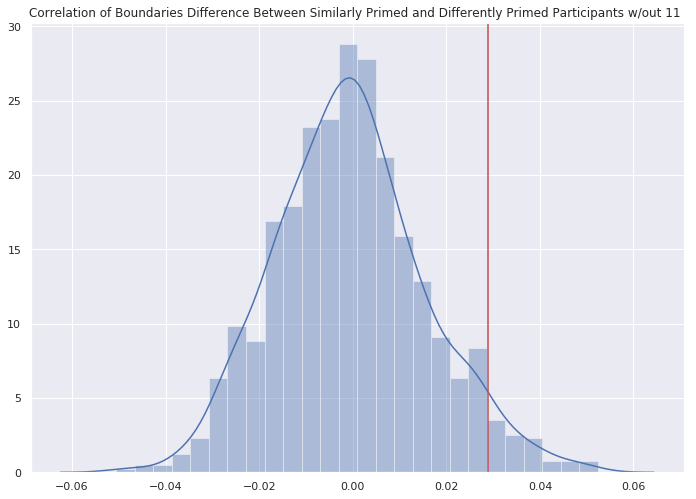

In [224]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(permutes)
plt.axvline(observed_correl_dif, 0,30, color = 'r')
plt.title('Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

In [225]:
#SFN ABSTRACT ANALYSIS 1 4.29.19
#NOT USING
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
cor_this = dict()


for key in isc_dict:
    print(soc_cor[key], 'soc_cor')
    print(isc_dict[key], 'isc_cor')
    s = (soc_cor[key] + loc_cor[key])/2 - isc_dict[key]
    cor_this[key] = s

    
    
    
print(cor_this)
print('soc/soc + loc/loc cor - soc/loc cor', np.array(list(cor_this.values())).mean())


0.1577916642824127 soc_cor
0.25664832661326425 isc_cor
0.3302002762169798 soc_cor
0.38817565595027176 isc_cor
0.3545245679456396 soc_cor
0.20043573877826265 isc_cor
0.2336487172178229 soc_cor
0.15119165888307928 isc_cor
0.20985257489672077 soc_cor
0.19438594801316078 isc_cor
0.21468811705803534 soc_cor
0.24783198743442642 isc_cor
0.1433510385893565 soc_cor
0.11318534025583046 isc_cor
0.16894675451510968 soc_cor
0.17222516231954957 isc_cor
0.24042685608175898 soc_cor
0.34683027578511294 isc_cor
0.11916350888251724 soc_cor
0.18540924799423916 isc_cor
0.19523681250099525 soc_cor
0.15655942054250466 isc_cor
0.46291855274635 soc_cor
0.4198602962574182 isc_cor
0.18156825980064079 soc_cor
0.23352754960792155 isc_cor
0.1932993111817978 soc_cor
0.20204691261880536 isc_cor
0.21484985796747316 soc_cor
0.17746907126500122 isc_cor
0.09966453255402896 soc_cor
0.16184556064948866 isc_cor
{'12': -0.07797559202491355, '31': -0.05081064631522353, '43': 0.06102262396825858, '24': 0.03795119221856269, '23

In [226]:
#SFN ABSTRACT ANALYSIS 2 4.30.19 



#removing story 11 which will definitely be changed for the actual experiment


#ANALYSIS 001
#AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

correl_dif_dict = dict()

for key in soc_story_keys:
    if key == '11':
        pass
    else:    
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        coef_matrix = np.corrcoef(new.T)
        this = coef_matrix[0:z,z:(z+x)]
        mean_isc = np.nanmean(this)
        soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        correls= np.concatenate((soc_correl, loc_correl), axis = None)
        mean_correl = np.nanmean(correls)
        story_value = mean_correl - mean_isc
        correl_dif_dict[key] = story_value
    

print(correl_dif_dict)
observed_correl_dif = np.array(list(correl_dif_dict.values())).mean()
print('soc/soc + loc/loc cor - soc/loc cor', observed_correl_dif)

{'12': -0.07056617998087097, '31': -0.04503263549420061, '43': 0.11272607130110207, '24': 0.059032918273595775, '23': 0.08080740812816223, '32': 0.040296310736634006, '44': 0.16135645730321332, '21': -0.06580277194293604, '33': -0.06724114978867843, '42': 0.02710295203171534, '14': 0.04643047872918077, '13': 0.019707653919045554, '41': 0.05234767856683725, '34': 0.0611493376333635, '22': 0.07195612648084526}
soc/soc + loc/loc cor - soc/loc cor 0.032284710393133936


In [227]:
#SFN ABSTRACT ANALYSIS 2 4.30.19




#no story 11


#ANALYSIS 002
#PERMUTATION: AVG CORRELATION OF KEY PRESSES OF SOCIAL-PRIMED PARTICIPANTS - AVG CORRELATION OF KEY PRESSES OF SOCIAL + LOCATION 
#PRIMED PARTICIPANTS
#AVG OF SAME PRIMED PARTICIPANTS IS COMPUTED ONCE AT THE END, NOT TWICE, FIRST FOR EACH GROUP, THEN ACROSS SOCIAL
#AND LOCATION

permutes = []

for i in range(0, 1000):
    correl_dif_dict = dict()
    for key in soc_story_keys:
        if key == '11':
            pass
        else:  
            z = len(soc_story_keys[key][0])
            x = len(loc_story_keys[key][0])
            new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
            #permute new
            this_perm = new[:, np.random.permutation(new.shape[1])]
            #this_perm = np.random.permutation(new)
            coef_matrix = np.corrcoef(this_perm.T)
            this = coef_matrix[0:z,z:(z+x)]
            mean_isc = np.nanmean(this)
            soc_correl = coef_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
            loc_correl = coef_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
            correls= np.concatenate((soc_correl, loc_correl), axis = None)
            mean_correl = np.nanmean(correls)
            story_value = mean_correl - mean_isc
            correl_dif_dict[key] = story_value
    this_avg = np.array(list(correl_dif_dict.values())).mean()
    permutes.append(this_avg)



In [228]:
#pvalue


#no 11

p_value_correl_dif = sum(i > observed_correl_dif for i in permutes)/1000
print('p = ', p_value_correl_dif)

p =  0.029


Text(0.5, 1.0, 'Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

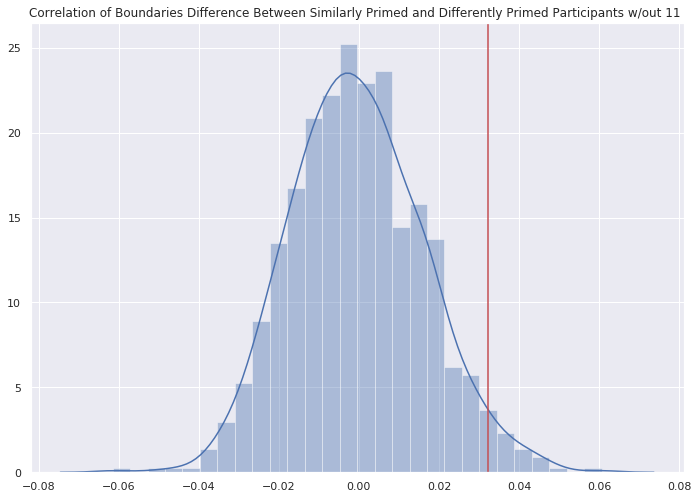

In [229]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(permutes)
plt.axvline(observed_correl_dif, 0,30, color = 'r')
plt.title('Correlation of Boundaries Difference Between Similarly Primed and Differently Primed Participants w/out 11 ')

In [234]:
#SFN ANALYSIS 3 4.30.19
#ANALYSIS 003
#INTERSECTION OVER UNION 

#actual


iu_dict = dict()

for key in soc_story_keys:
    z = len(soc_story_keys[key][0])
    x = len(loc_story_keys[key][0])
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #print('key', key, '\n', new)
    new_t = new.T
    numerator_sum = np.dot(new_t, new)
    m, n = numerator_sum.shape
    #print('numerator', '\n',numerator_sum)
    denom = np.zeros((m,m))
    for i in range(0, m):
        for j in range(0, m):
            sum_col = new[:,i] + new[:, j]
            denom_val = np.sum(np.minimum(sum_col, 1))
            denom[i, j] = denom_val
    #divide the intersection matrix by the denominator matrix
    #print('denom\n', denom)
    i_u_matrix = numerator_sum/denom
    #print(key, i_u_matrix)
    #dif between differently and same primed participants
        #avg i/u of differently primed participants
    this_iu = i_u_matrix[0:z,z:(z+x)]
    mean_this_iu = np.nanmean(this_iu)
    soc_i_u = i_u_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
    loc_i_u = i_u_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
    i_u_s= np.concatenate((soc_i_u, loc_i_u), axis = None)
    mean_i_u = np.nanmean(i_u_s)
    iu_value = mean_i_u - mean_this_iu
    iu_dict[key] = iu_value
            
#print('\n\n\n\n\n\n\n\n\n\n\n\n\n')
print(iu_dict)
this_avg_iu = np.array(list(correl_dif_dict.values())).mean()
print('\n\navg i/u value: ', this_avg_iu)






{'12': -0.047837960810311025, '31': -0.05124477523671073, '43': 0.047452833114597776, '24': 0.027063791952122912, '23': 0.04955196969499803, '11': 0.009929456114634111, '32': -0.00859006931656503, '44': 0.12143446368446378, '21': -0.06742220392430481, '33': -0.04926928086320881, '42': 0.032755485255485245, '14': 0.005808906701763872, '13': -0.020207878541211838, '41': 0.02774653450144962, '34': 0.043971148021054035, '22': 0.034076635130894456}


avg i/u value:  0.012445467454033987


In [238]:
#SFN ANALYSIS 3 4.30.19
#ANALYSIS 003
#INTERSECTION OVER UNION 



#PERMUTATION TEST

iu_permutes = []

for i in range(0, 1000):
    iu_dict = dict()
    for key in soc_story_keys:
        z = len(soc_story_keys[key][0])
        x = len(loc_story_keys[key][0])
        new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
        #perm new
        this_perm = new[:, np.random.permutation(new.shape[1])]
        #print('key', key, '\n', new)
        new_t = this_perm.T
        numerator_sum = np.dot(new_t, this_perm)
        m, n = numerator_sum.shape
        #print('numerator', '\n',numerator_sum)
        denom = np.zeros((m,m))
        for i in range(0, m):
            for j in range(0, m):
                sum_col = this_perm[:,i] + this_perm[:, j]
                denom_val = np.sum(np.minimum(sum_col, 1))
                denom[i, j] = denom_val
        #divide the intersection matrix by the denominator matrix
        #print('denom\n', denom)
        i_u_matrix = numerator_sum/denom
        #print(key, i_u_matrix)
        #dif between differently and same primed participants
            #avg i/u of differently primed participants
        this_iu = i_u_matrix[0:z,z:(z+x)]
        mean_this_iu = np.nanmean(this_iu)
        soc_i_u = i_u_matrix[0:z, 0:z][np.triu(np.ones((z,z), dtype=np.bool),1)]
        loc_i_u = i_u_matrix[z:(z+x), z:(z+x)][np.triu(np.ones((x,x), dtype=np.bool),1)]
        i_u_s= np.concatenate((soc_i_u, loc_i_u), axis = None)
        mean_i_u = np.nanmean(i_u_s)
        iu_value = mean_i_u - mean_this_iu
        iu_dict[key] = iu_value
    this_avg_iu = np.array(list(iu_dict.values())).mean()
    iu_permutes.append(this_avg_iu)
            


In [239]:
#pvalue


p_value_iu = sum(i > this_avg_iu for i in iu_permutes)/1000
print('p = ', p_value_iu)

p =  0.085


Text(0.5, 1.0, 'Intersection over Union Permutation Test')

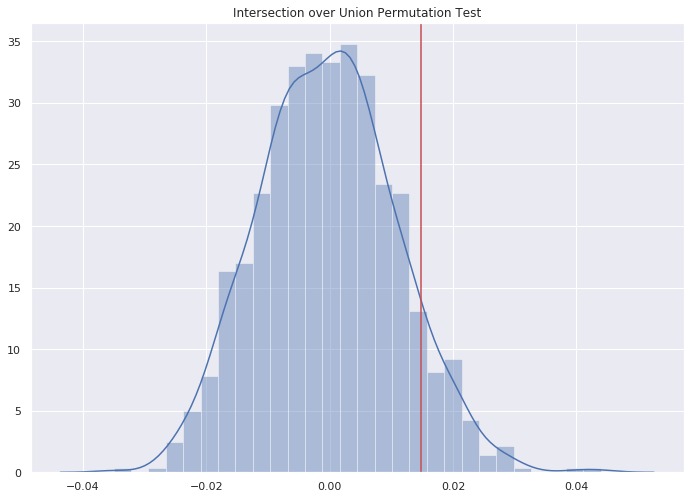

In [240]:
##plot the permutes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(iu_permutes)
plt.axvline(this_avg_iu, 0,30, color = 'r')
plt.title('Intersection over Union Permutation Test')

In [48]:
#CORRELATION BETWEEN SOCIAL PRIMED RESPONSES/A PRIORI SOCIAL BOUNDARIES - LOCATION PRIMED RESPONSES/A PRIORI SOCIAL BOUNDARIES
#CORRELATION BETWEEN LOCATION PRIMED RESPONSES/A PRIORI LOCATION BOUNDARIES - SOCIAL PRIMED RESPONSES/A PRIORI LOCATION BOUNDARIES
#SFN analysis 4.29.19
#find the correlation between all participants' event boundaries and a priori boundaries
soc_a_priori_corr_dict = dict()
loc_a_priori_corr_dict = dict()

for key in soc_story_keys:
    #concatenate the key presses for social and location primed participants for each story
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((loc_story_keys[key], loc))
    soc_new = np.hstack((soc_story_keys[key], soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
a_priori_corr_dict

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [23]:
loc = [[i] for i in all_story_priors['11'][:,2]]
print(loc, len(loc))
print(loc_story_keys['11'], len(loc_story_keys['11']))
loc_new = np.hstack((loc_story_keys['12'], loc))
print(loc_new)

[[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]] 59
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0.

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [18]:
#I THINK THIS IS A BAD ANALYSIS BC I SHOULD ONLY BE CORRELATION THE A PRIORI BOUNDARIES OF SOCIAL SCRIPT TO SOCIAL PRIMED 
#PARTICIPANTS
#find the correlation between all participants' event boundaries and a priori boundaries
a_priori_corr_dict = dict()

for key in soc_story_keys:
    #concatenate the key presses for social and location primed participants for each story
    new = np.concatenate((soc_story_keys[key], loc_story_keys[key]), axis = 1)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((new, loc))
    soc_new = np.hstack((new, soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    a_priori_corr_dict[key] = [avg_loc, avg_soc]

    
a_priori_corr_dict

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [28]:
#find the correlation between event boundaries of participants primed with location schemas and a priori boundaries
loc_a_priori_corr_dict = dict()
soc_primed_to_loc_a_priori = dict()
loc_primed_to_loc_a_priori = dict()

for key in soc_story_keys:
    print(key)
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    print(loc, len(loc))
    print(loc_story_keys['12'], len(loc_story_keys['12']))
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((loc_story_keys[key], loc))
    soc_new = np.hstack((loc_story_keys[key], soc))
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    loc_a_priori_corr_dict[key] = [avg_loc, avg_soc]
    soc_primed_to_loc_a_priori[key] = avg_soc
    loc_primed_to_loc_a_priori[key] = avg_loc

    


12
[[1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0]] 35
[[1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]] 32


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [20]:
#find the correlation between event boundaries of participants primed with social schemas and a priori boundaries
soc_a_priori_corr_dict = dict()

for key in soc_story_keys:
    #make a priori boundaries into columns
    loc = [[i] for i in all_story_priors[key][:,2]]
    soc = [[i] for i in all_story_priors[key][:,3]]
    #concatenate key presses w a priori boundaries
    loc_new = np.hstack((soc_story_keys[key], loc))
    soc_new = np.hstack((soc_story_keys[key], soc))
    if key == '41':
        print(soc_new)
    #generate correlation matrix
    loc_coef_matrix = np.corrcoef(loc_new.T)
    soc_coef_matrix = np.corrcoef(soc_new.T)
    #take the last row
    loc_line = loc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    soc_line = soc_coef_matrix[(len(loc_coef_matrix) - 1), :]
    #remove the last element
    loc_record = loc_line[:-1]
    soc_record = soc_line[:-1]
    #average the values
    avg_loc = np.nanmean(loc_record)
    avg_soc = np.nanmean(soc_record)
    #put in the dictionary
    soc_a_priori_corr_dict[key] = [avg_loc, avg_soc]

    


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [21]:
#plot all the correlation values for each story together

for key in a_priori_corr_dict:
    these_labels = ['all;loc', 'all;soc', 'loc-primed;loc', 'loc-primed;soc', 'soc-primed;loc', 'soc-primed;soc','cor-within loc', 'cor-within soc', 'cor across schemas']
    x_pos = np.arange(len(these_labels))
    x, y = a_priori_corr_dict[key]
    a, b = loc_a_priori_corr_dict[key]
    c, d = soc_a_priori_corr_dict[key]
    e = loc_cor[key]
    f = soc_cor[key]
    g = isc_dict[key]
    print(x)
    these_values = [x, y, a, b, c, d, e, f, g]
    print(these_values)
    plt.figure()
    plt.figure(figsize = (15,5))
    plt.bar(x_pos, these_values, align='center', alpha=0.5)
    plt.xticks(x_pos, these_labels)
    plt.ylim([0,0.6])
    plt.ylabel('Corr')
    plt.title(key + ' Correlations')
    plt.savefig('correlation_figs/'+key+'correlation_bar_graphs.png')
